In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [4]:
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 

In [5]:
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

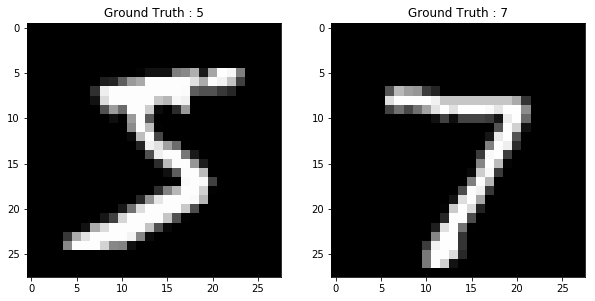

In [6]:
plt.show()

In [7]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)


In [8]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [9]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [10]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s - loss: 0.2820 - acc: 0.9125 - val_loss: 0.1465 - val_acc: 0.9529
Epoch 2/20
60000/60000 [==============================] - 11s - loss: 0.0999 - acc: 0.9693 - val_loss: 0.1041 - val_acc: 0.9673
Epoch 3/20
60000/60000 [==============================] - 12s - loss: 0.0633 - acc: 0.9803 - val_loss: 0.0849 - val_acc: 0.9735
Epoch 4/20
60000/60000 [==============================] - 11s - loss: 0.0429 - acc: 0.9859 - val_loss: 0.0737 - val_acc: 0.9798
Epoch 5/20
60000/60000 [==============================] - 12s - loss: 0.0322 - acc: 0.9893 - val_loss: 0.0693 - val_acc: 0.9809
Epoch 6/20
60000/60000 [==============================] - 12s - loss: 0.0245 - acc: 0.9921 - val_loss: 0.0772 - val_acc: 0.9799
Epoch 7/20
60000/60000 [==============================] - 12s - loss: 0.0189 - acc: 0.9940 - val_loss: 0.0934 - val_acc: 0.9773
Epoch 8/20
60000/60000 [==============================

In [13]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s     
Evaluation result on Test Data : Loss = 0.12461484266087464, accuracy = 0.9833


In [20]:
print(history.history.keys())


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


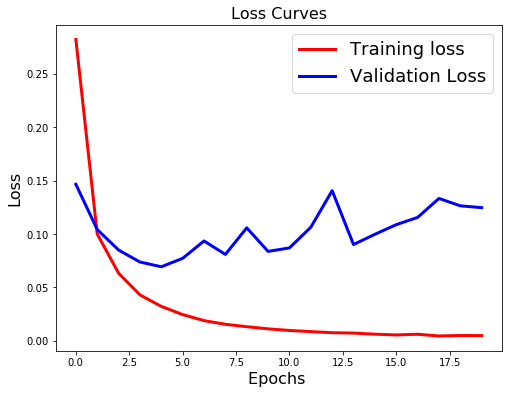

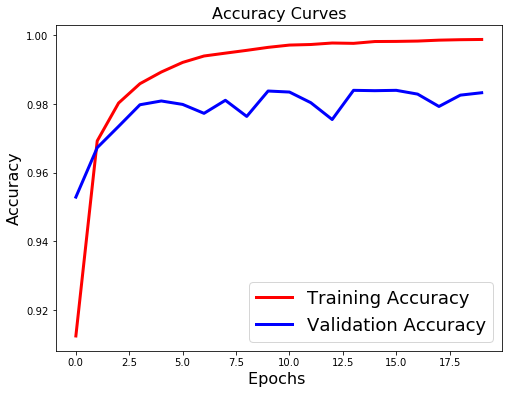

In [26]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

In [27]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

In [28]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s - loss: 0.3832 - acc: 0.8794 - val_loss: 0.1848 - val_acc: 0.9398
Epoch 2/20
60000/60000 [==============================] - 13s - loss: 0.1716 - acc: 0.9488 - val_loss: 0.1020 - val_acc: 0.9685
Epoch 3/20
60000/60000 [==============================] - 15s - loss: 0.1343 - acc: 0.9594 - val_loss: 0.0819 - val_acc: 0.9751
Epoch 4/20
60000/60000 [==============================] - 14s - loss: 0.1119 - acc: 0.9671 - val_loss: 0.0804 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 12s - loss: 0.0985 - acc: 0.9705 - val_loss: 0.0875 - val_acc: 0.9743
Epoch 6/20
60000/60000 [==============================] - 15s - loss: 0.0901 - acc: 0.9733 - val_loss: 0.0690 - val_acc: 0.9808
Epoch 7/20
60000/60000 [==============================] - 15s - loss: 0.0813 - acc: 0.9759 - val_loss: 0.0746 - val_acc: 0.9804
Epoch 8/20
60000/60000 [==============================

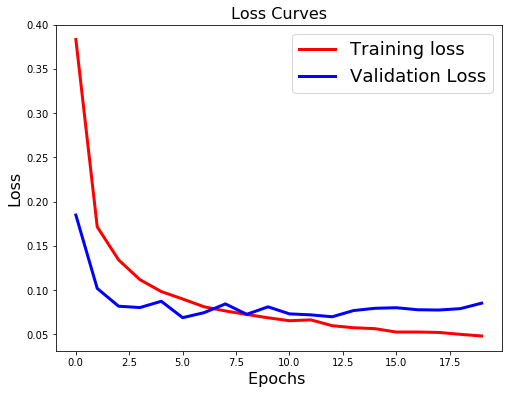

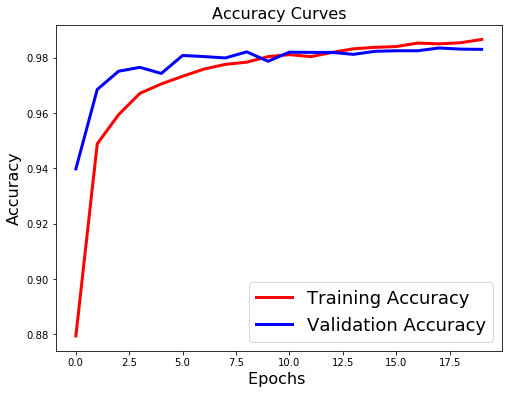

In [30]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

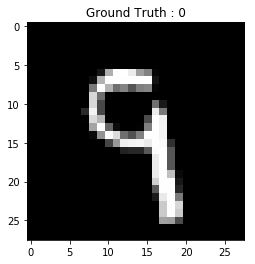

In [52]:
plt.subplot('111')
plt.imshow(test_images[1081,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1001]))
plt.show()

In [53]:
# Predict the most likely class
model_reg.predict_classes(test_data[[1081],:])

1/1 [==============================] - 0s


array([9])

In [54]:
# Predict the probabilities for each class 
model_reg.predict(test_data[[0],:])

array([[  1.65168284e-19,   6.98951895e-16,   1.15787397e-11,
          2.29611122e-11,   2.43540988e-20,   1.04537921e-16,
          7.11059504e-30,   1.00000000e+00,   1.23123096e-17,
          5.66589449e-11]], dtype=float32)